Exercise 1

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("insurance.csv")

Saving insurance.csv to insurance.csv


(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.

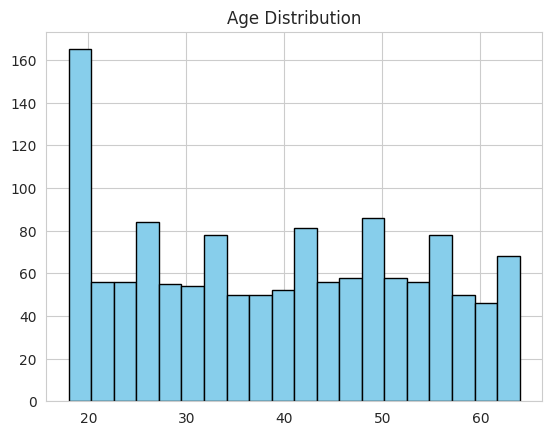

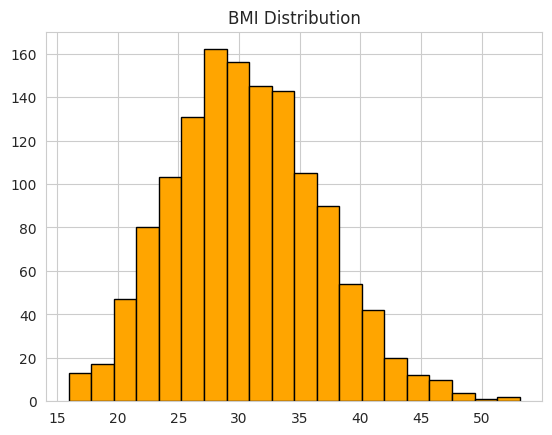

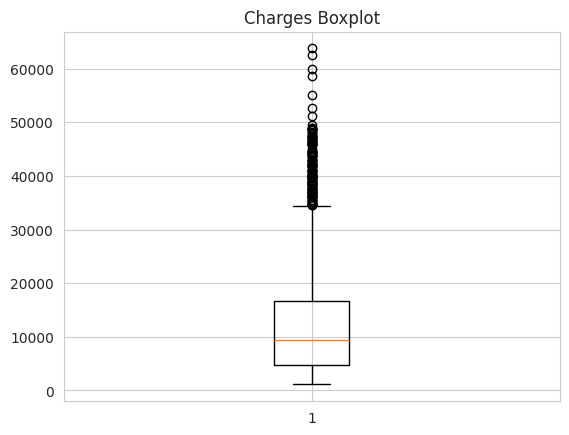

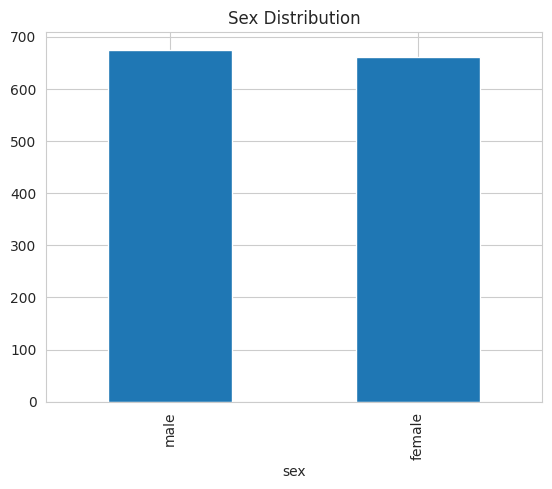

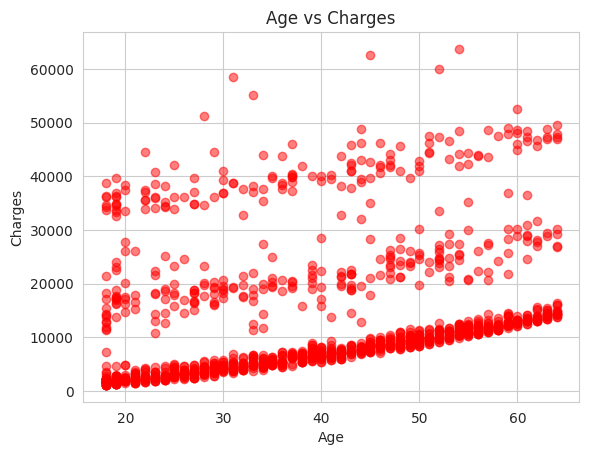

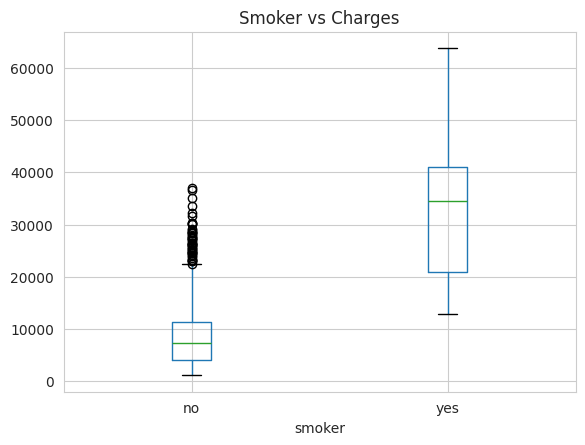

Corr Age-Charges: 0.2983082125097864


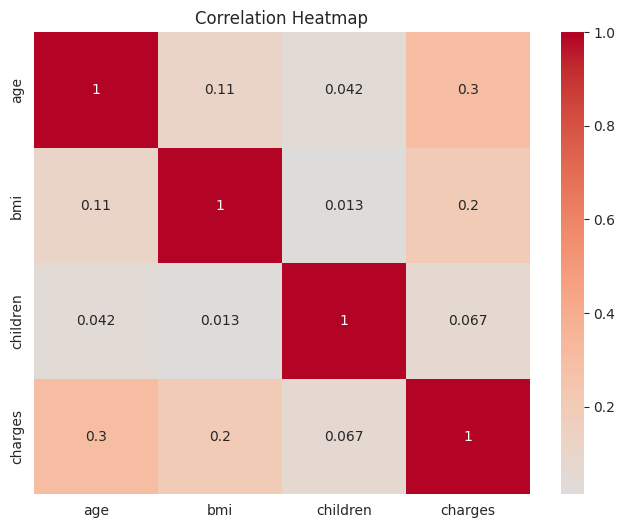

In [3]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional seaborn
import seaborn as sns
sns.set_style('whitegrid')

# 2. Load Dataset
df = pd.read_csv("insurance.csv")

# 3. Basic Infos
print(df.shape)
print(df.info())
print(df.describe())
print(df.describe(include="O"))

# 4. Data Cleaning
print(df.isnull().sum())
print("Duplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 5. Univariate Analysis
# Histogram Age
plt.hist(df['age'], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.show()

# Histogram BMI
plt.hist(df['bmi'], bins=20, color="orange", edgecolor="black")
plt.title("BMI Distribution")
plt.show()

# Boxplot Charges
plt.boxplot(df['charges'])
plt.title("Charges Boxplot")
plt.show()

# Bar plot Sex
df['sex'].value_counts().plot(kind="bar", title="Sex Distribution")
plt.show()

# 6. Bivariate Analysis
# Scatter Age vs Charges
plt.scatter(df['age'], df['charges'], alpha=0.5, color="red")
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

# Boxplot Smoker vs Charges
df.boxplot(column="charges", by="smoker")
plt.title("Smoker vs Charges")
plt.suptitle("")
plt.show()

# Correlation Age-Charges
print("Corr Age-Charges:", df['age'].corr(df['charges']))

# 7. Multivariate Analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Exercise 2

In [4]:
# Titanic — Cell 1: Upload & load

from google.colab import files
import io
import pandas as pd
from IPython.display import display

uploaded = files.upload()  # choose Titanic.csv or train.csv from your computer

# Pick a filename robustly
if "Titanic.csv" in uploaded:
    fname = "Titanic.csv"
elif "train.csv" in uploaded:
    fname = "train.csv"
else:
    fname = next(iter(uploaded))  # first selected file

df = pd.read_csv(io.BytesIO(uploaded[fname]))
print(f"Loaded: {fname}   shape={df.shape}")
display(df.head())


Saving Titanic.csv to Titanic.csv
Loaded: Titanic.csv   shape=(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Titanic — Cell 2: Inspect

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric):")

display(df.select_dtypes(include=["int64", "float64"]).describe())

print("\nDescribe (object):")

display(df.select_dtypes(include=["object"]).describe())

print("\nMissing values (count):")
print(df.isna().sum())




Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Describe (numeric):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Describe (object):


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270



Missing values (count):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


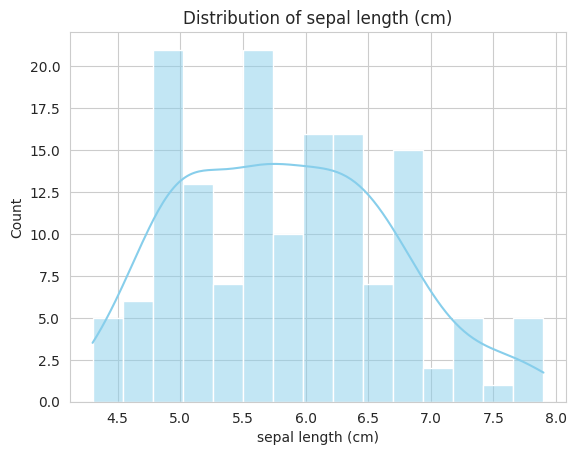

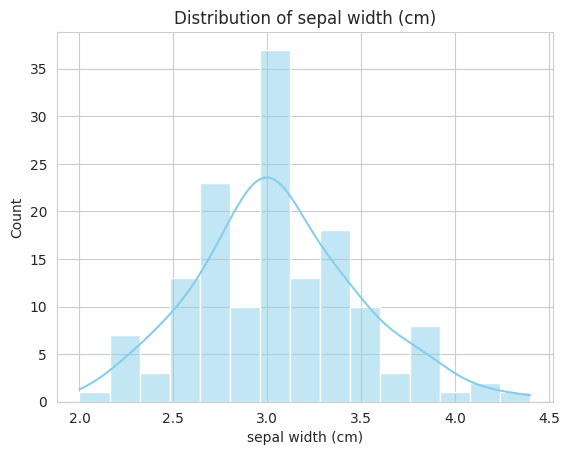

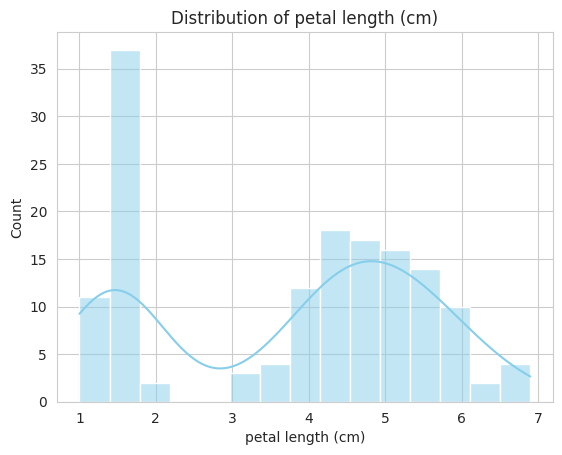

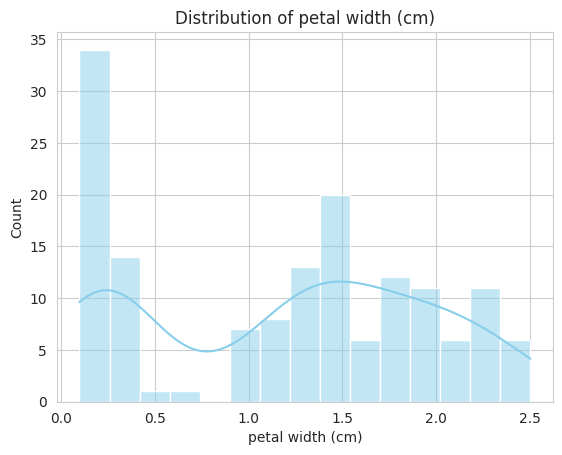

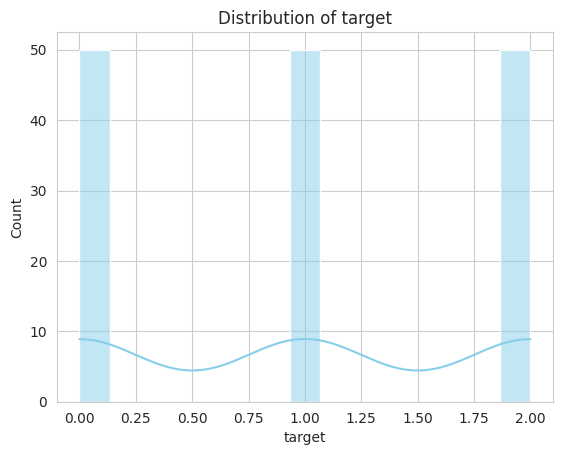

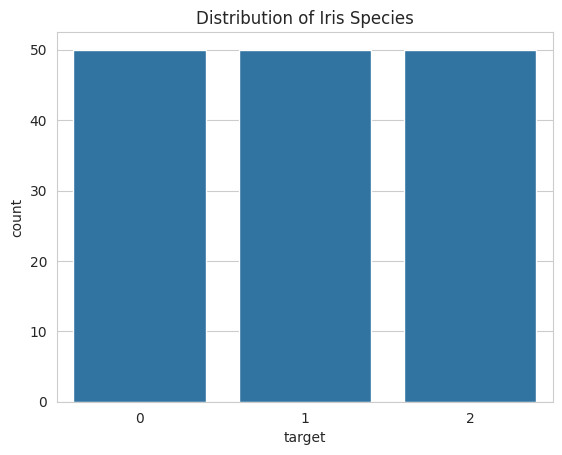

In [8]:
#cell 3
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# 2. Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris_df = iris.frame   # <-- ici on crée bien iris_df

# 3. Data Visualization
# Numeric columns
num_cols = [c for c in iris_df.columns if iris_df[c].dtype.kind in "iuf"]

for c in num_cols:
    plt.figure()
    sns.histplot(iris_df[c], kde=True, bins=15, color="skyblue")
    plt.title(f"Distribution of {c}")
    plt.show()

# Distribution of species
plt.figure()
sns.countplot(x="target", data=iris_df)
plt.title("Distribution of Iris Species")
plt.show()


In [9]:
# Iris — Cell 4: Scatter by species (sepal), then (petal)

if {"Species"}.issubset(iris_df.columns):
    species_list = iris_df["Species"].unique().tolist()

    # Choose pairs (adapt to your column names if using Kaggle CSV)
    pairs = []
    # sklearn names:
    if {"sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"}.issubset(iris_df.columns):
        pairs = [("sepal length (cm)", "sepal width (cm)"),
                 ("petal length (cm)", "petal width (cm)")]
    # Kaggle names:
    elif {"SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"}.issubset(iris_df.columns):
        pairs = [("SepalLengthCm", "SepalWidthCm"),
                 ("PetalLengthCm", "PetalWidthCm")]

    markers = ["o", "s", "^", "x", "D", "P"]

    for (x, y) in pairs:
        plt.figure()
        for i, sp in enumerate(species_list):
            sub = iris_df[iris_df["Species"] == sp]
            plt.scatter(sub[x], sub[y], label=sp, alpha=0.7, marker=markers[i % len(markers)])
        plt.title(f"{x} vs {y} by Species")
        plt.xlabel(x); plt.ylabel(y); plt.legend()
        plt.tight_layout(); plt.show()


In [10]:
# Iris — Cell 5: Boxplots by species for each numeric feature

if "Species" in iris_df.columns:
    species_list = iris_df["Species"].unique().tolist()
    for c in num_cols:
        data = [iris_df.loc[iris_df["Species"] == sp, c].dropna() for sp in species_list]
        plt.figure()
        plt.boxplot(data, labels=species_list)
        plt.title(f"Boxplot of {c} by Species")
        plt.xlabel("Species"); plt.ylabel(c)
        plt.tight_layout(); plt.show()


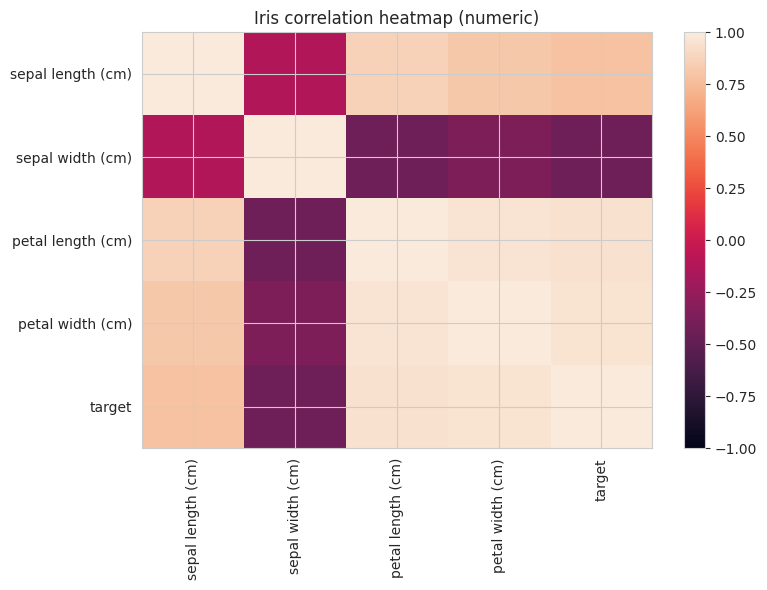

In [11]:
# Iris — Cell 6: Correlation heatmap (numeric)

import numpy as np

corr = iris_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Iris correlation heatmap (numeric)")
plt.tight_layout(); plt.show()


Exercise 3

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

# Conversion in DataFrame
iris_df = iris.frame
iris_df['Species'] = iris.target_names[iris_df['target']]  # mapping int → string

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
print("Shape:", iris_df.shape)
print("\nInfo:")
print(iris_df.info())
print("\nDescribe (numérique):")
display(iris_df.describe())
print("\nUnique species:", iris_df['Species'].unique())
print("\nDistribution des espèces:")
print(iris_df['Species'].value_counts())


Shape: (150, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Describe (numérique):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Unique species: ['setosa' 'versicolor' 'virginica']

Distribution des espèces:
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


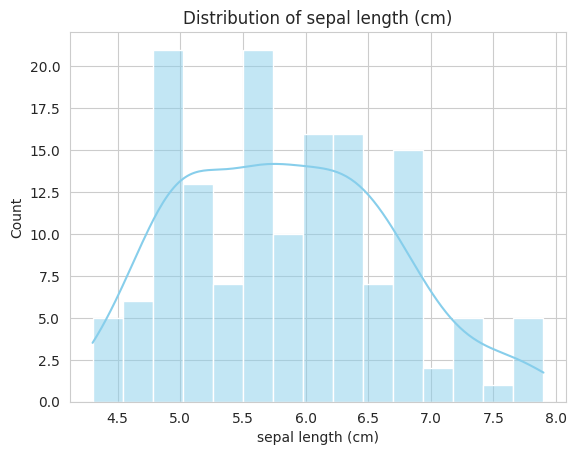

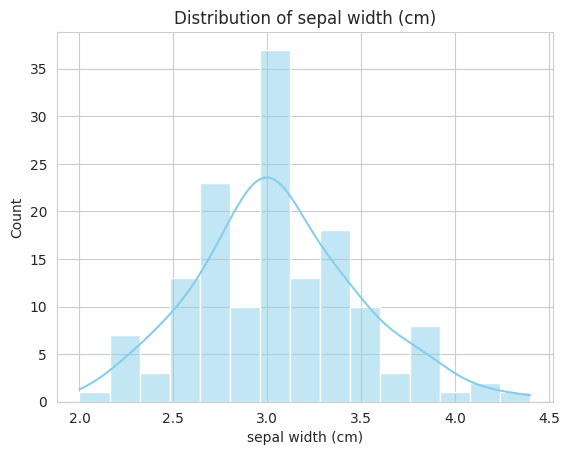

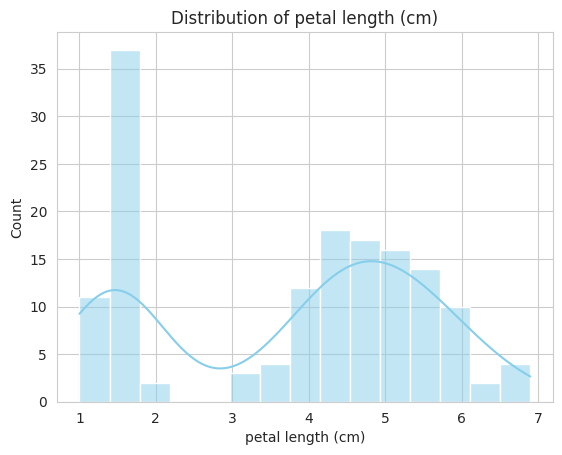

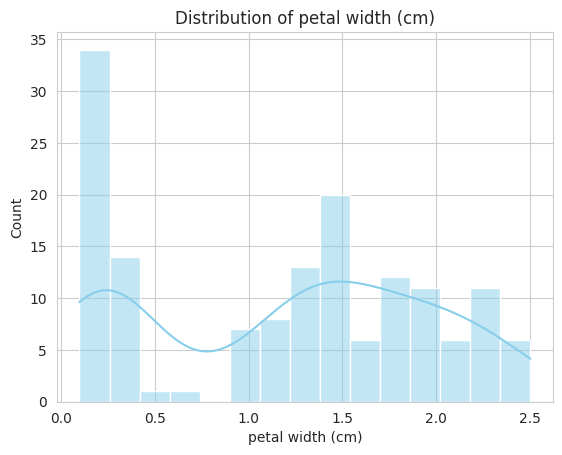

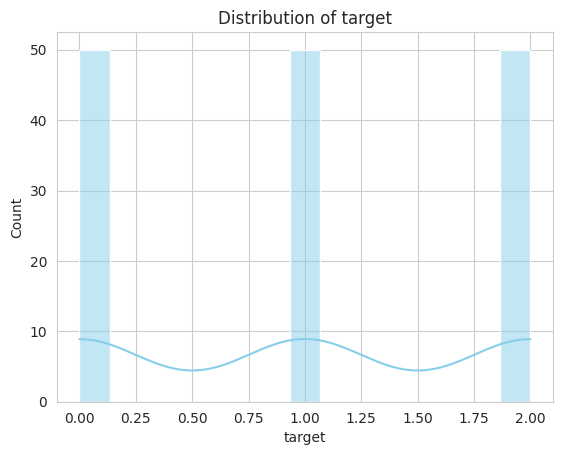

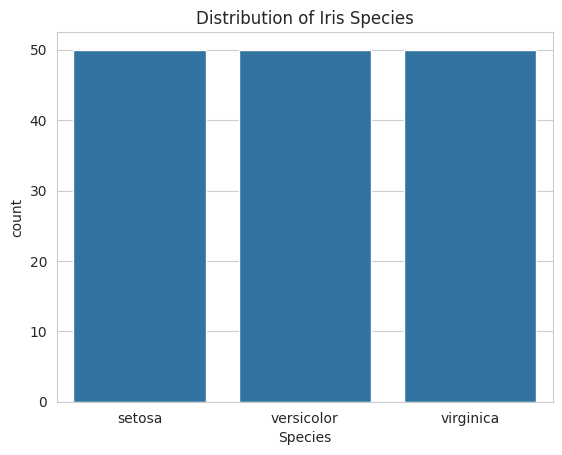

In [14]:
num_cols = [c for c in iris_df.columns if iris_df[c].dtype.kind in "iuf"]

for c in num_cols:
    plt.figure()
    sns.histplot(iris_df[c], bins=15, kde=True, color="skyblue")
    plt.title(f"Distribution of {c}")
    plt.show()

plt.figure()
sns.countplot(x="Species", data=iris_df)
plt.title("Distribution of Iris Species")
plt.show()


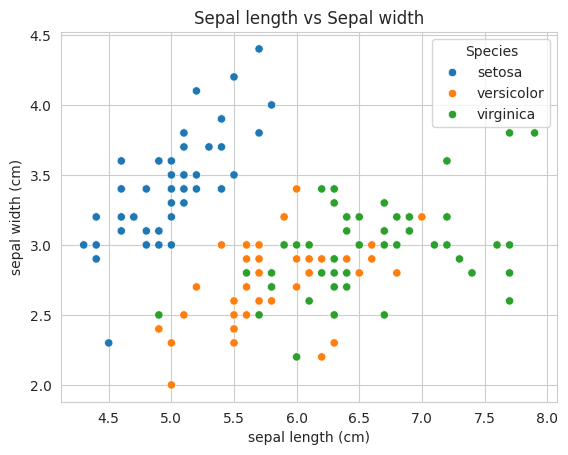

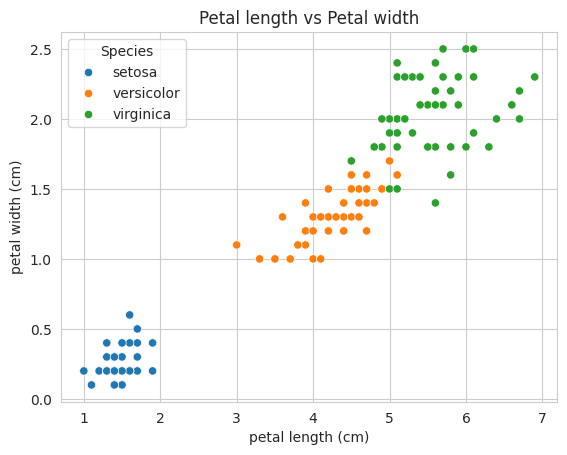

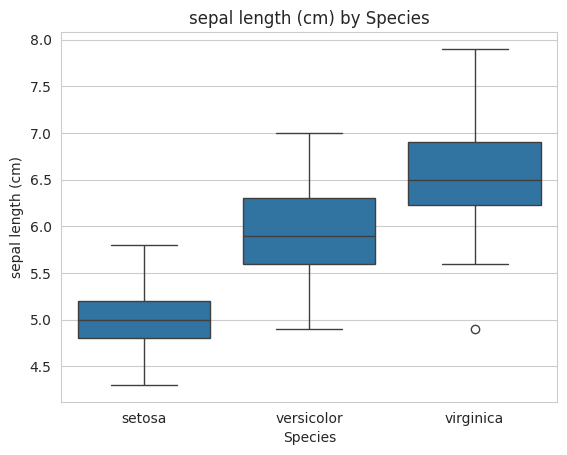

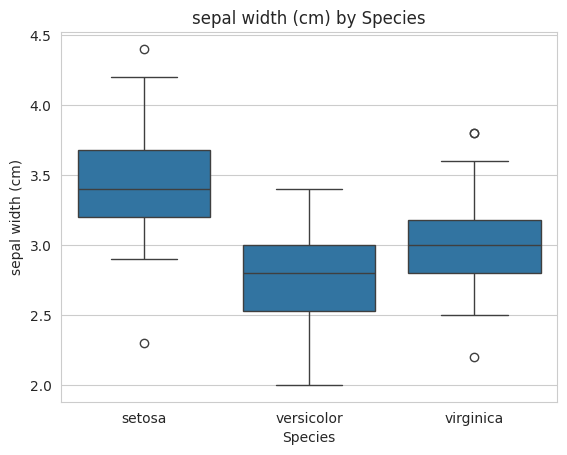

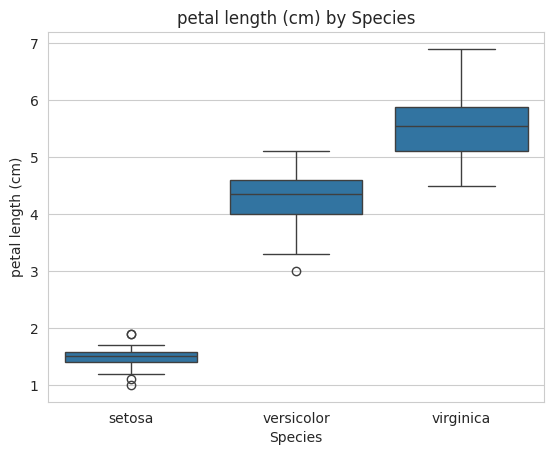

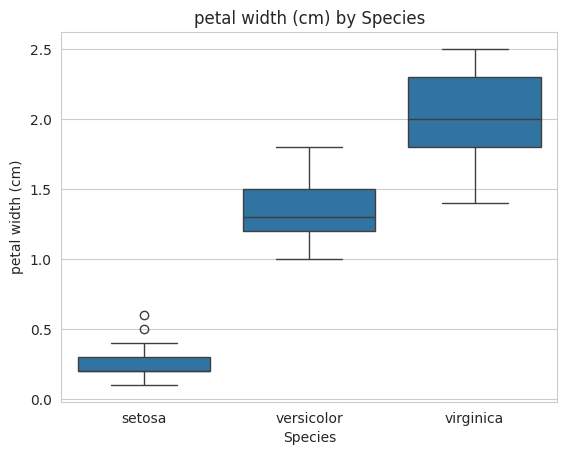

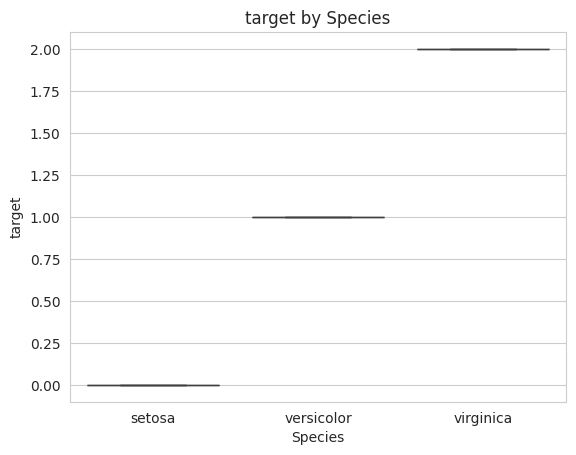

In [15]:
# Scatterplots pairwise (Age-like style)
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Species", data=iris_df)
plt.title("Sepal length vs Sepal width")
plt.show()

sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="Species", data=iris_df)
plt.title("Petal length vs Petal width")
plt.show()

# Boxplots pour comparer charges
for c in num_cols:
    plt.figure()
    sns.boxplot(x="Species", y=c, data=iris_df)
    plt.title(f"{c} by Species")
    plt.show()


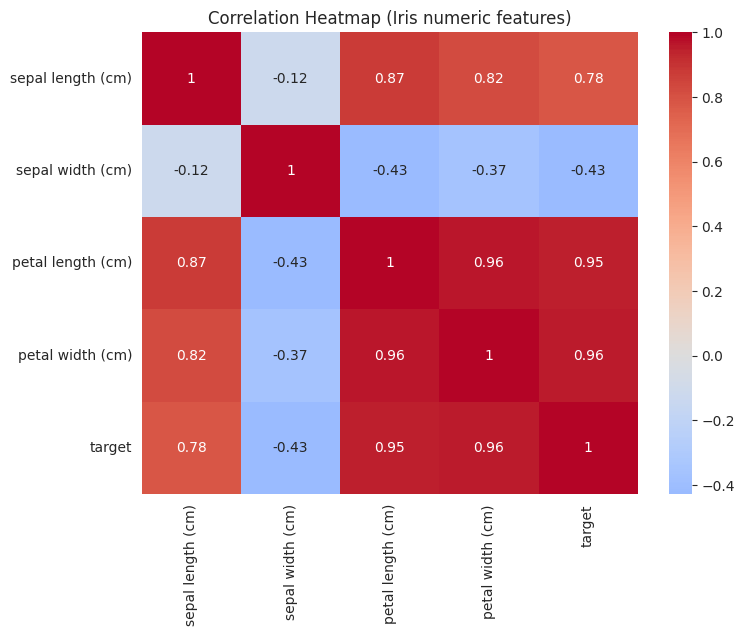

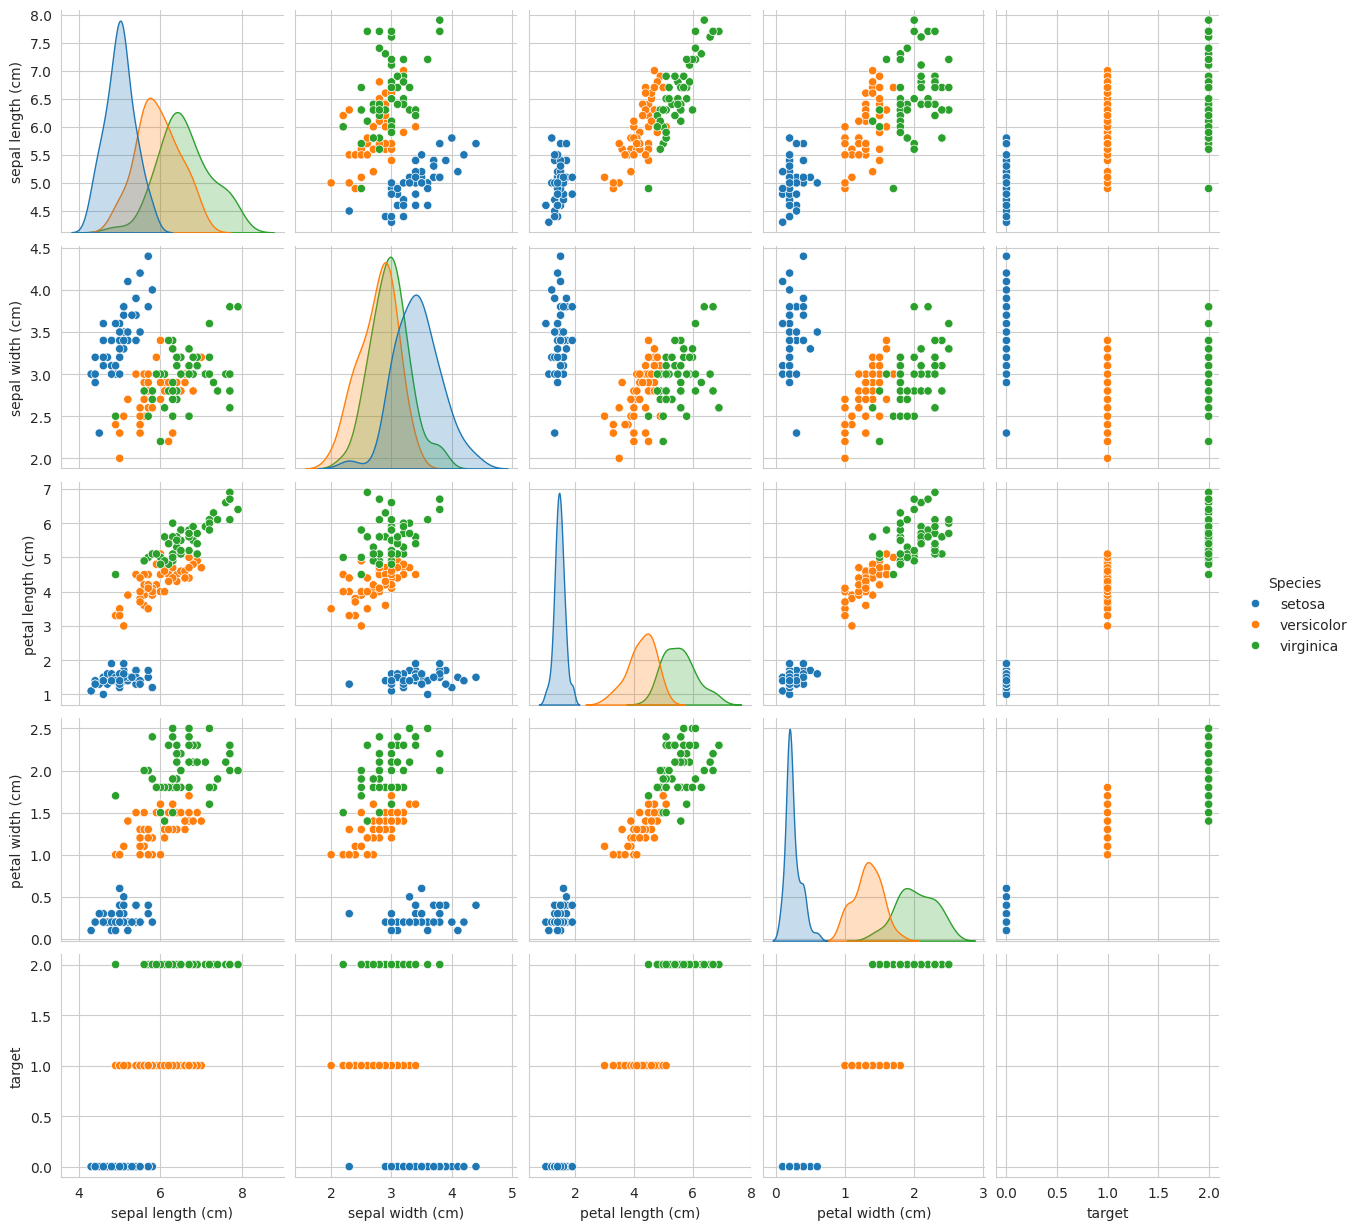

In [16]:
# Heatmap corrélations
corr = iris_df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Iris numeric features)")
plt.show()

# Pairplot complet
sns.pairplot(iris_df, hue="Species")
plt.show()


Conclusion (Insights)

The analysis of the Iris dataset highlights that petal length and petal width are the most discriminative features among the three species. Setosa is clearly distinct, with consistently smaller petal measurements compared to the other two species. In contrast, Versicolor and Virginica show overlapping distributions, though Virginica tends to have larger values overall. Sepal measurements, while useful, are less effective in distinguishing between the species compared to the petal dimensions. Overall, petal-based features provide the clearest separation and play a central role in species classification.